In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Check for missing values

In [6]:
df.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

### Let's explore Average Fundamental Frequencies (MDVP:Fo(Hz))

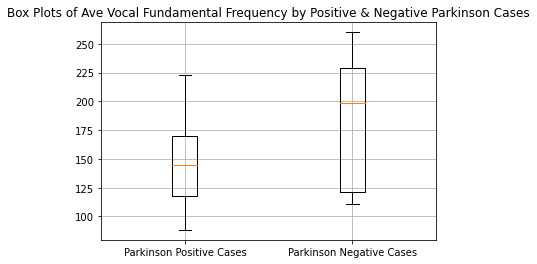

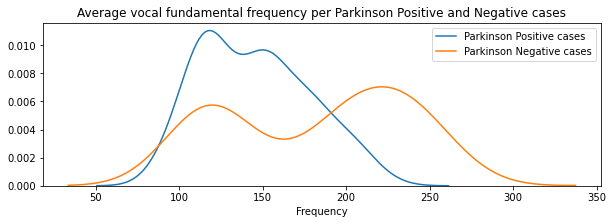

+------------+--------------------------+--------------------------+
| Percentile | Parkinson Positive cases | Parkinson Negative cases |
+------------+--------------------------+--------------------------+
|     0      |          88.333          |         110.739          |
|     5      |          99.394          |         114.012          |
|     10     |         109.439          |         116.014          |
|     15     |         112.136          |         116.396          |
|     20     |         114.942          |          116.91          |
|     25     |         117.572          |         120.948          |
|     30     |         120.061          |         124.635          |
|     35     |         122.342          |         128.602          |
|     40     |         128.138          |         174.588          |
|     45     |         138.878          |         197.691          |
|     50     |         145.174          |         198.996          |
|     55     |         149.728    

In [13]:
ave_freq_affected = df[df['status']==1]['MDVP:Fo(Hz)'].values
ave_freq_not_affected = df[df['status']==0]['MDVP:Fo(Hz)'].values

plt.boxplot([ave_freq_affected, ave_freq_not_affected])
plt.title('Box Plots of Ave Vocal Fundamental Frequency by Positive & Negative Parkinson Cases')
plt.xticks([1,2], ('Parkinson Positive Cases','Parkinson Negative Cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

sns.distplot(ave_freq_affected, hist=False, label="Parkinson Positive cases")
sns.distplot(ave_freq_not_affected, hist=False, label="Parkinson Negative cases")
plt.title('Average vocal fundamental frequency per Parkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Percentile", "Parkinson Positive cases", "Parkinson Negative cases"]
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(ave_freq_affected,i),  3), np.round(np.percentile(ave_freq_not_affected,i), 3)])
print(x)

### Let's explore Highest Fundamental Frequencies (MDVP:Fhi(Hz))

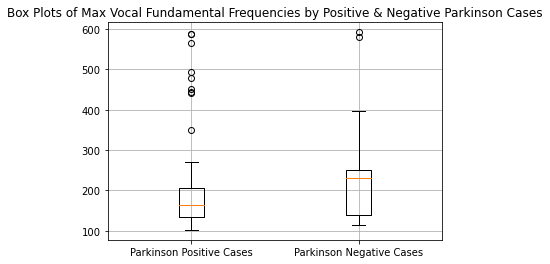

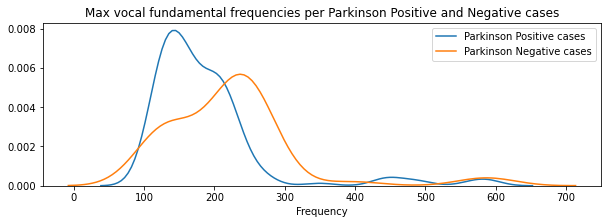

+------------+--------------------------+--------------------------+
| Percentile | Parkinson Positive cases | Parkinson Negative cases |
+------------+--------------------------+--------------------------+
|     0      |         102.145          |         113.597          |
|     5      |         114.397          |         120.547          |
|     10     |         125.269          |         127.205          |
|     15     |         127.515          |         130.215          |
|     20     |         131.076          |         134.566          |
|     25     |         133.776          |         139.413          |
|     30     |         139.697          |         180.252          |
|     35     |         144.416          |         209.986          |
|     40     |         157.317          |         211.588          |
|     45     |         160.865          |         217.563          |
|     50     |         163.335          |         231.162          |
|     55     |         170.097    

In [16]:
hi_freq_affected = df[df['status']==1]['MDVP:Fhi(Hz)'].values
hi_freq_not_affected = df[df['status']==0]['MDVP:Fhi(Hz)'].values

plt.boxplot([hi_freq_affected, hi_freq_not_affected])
plt.title('Box Plots of Max Vocal Fundamental Frequencies by Positive & Negative Parkinson Cases')
plt.xticks([1,2], ('Parkinson Positive Cases','Parkinson Negative Cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

sns.distplot(hi_freq_affected, hist=False, label="Parkinson Positive cases")
sns.distplot(hi_freq_not_affected, hist=False, label="Parkinson Negative cases")
plt.title('Max vocal fundamental frequencies per Parkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Percentile", "Parkinson Positive cases", "Parkinson Negative cases"]
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(hi_freq_affected,i),  3), np.round(np.percentile(hi_freq_not_affected,i), 3)])
print(x)

### Let's explore Lowest Fundamental Frequencies (MDVP:Flo(Hz))

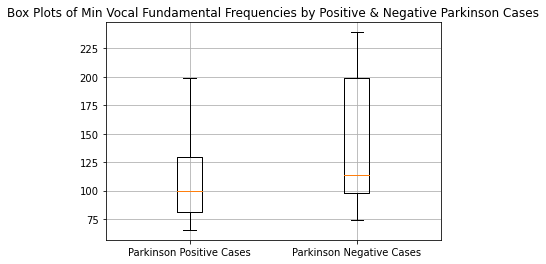

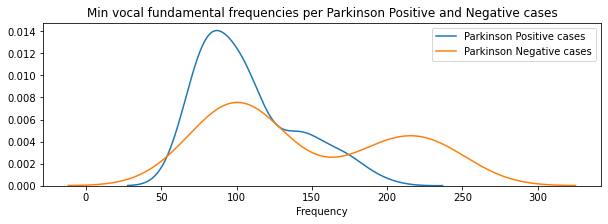

+------------+--------------------------+--------------------------+
| Percentile | Parkinson Positive cases | Parkinson Negative cases |
+------------+--------------------------+--------------------------+
|     0      |          65.476          |          74.287          |
|     5      |          67.66           |          78.062          |
|     10     |          75.347          |          86.521          |
|     15     |          76.761          |          90.967          |
|     20     |          79.092          |          95.322          |
|     25     |          80.876          |          98.244          |
|     30     |          84.05           |          99.945          |
|     35     |          86.87           |         103.747          |
|     40     |          90.607          |         108.238          |
|     45     |          94.549          |         109.888          |
|     50     |          99.77           |         113.938          |
|     55     |         104.352    

In [17]:
lo_freq_affected = df[df['status']==1]['MDVP:Flo(Hz)'].values
lo_freq_not_affected = df[df['status']==0]['MDVP:Flo(Hz)'].values

plt.boxplot([lo_freq_affected, lo_freq_not_affected])
plt.title('Box Plots of Min Vocal Fundamental Frequencies by Positive & Negative Parkinson Cases')
plt.xticks([1,2], ('Parkinson Positive Cases','Parkinson Negative Cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

sns.distplot(lo_freq_affected, hist=False, label="Parkinson Positive cases")
sns.distplot(lo_freq_not_affected, hist=False, label="Parkinson Negative cases")
plt.title('Min vocal fundamental frequencies per Parkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Percentile", "Parkinson Positive cases", "Parkinson Negative cases"]
for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(lo_freq_affected,i),  3), np.round(np.percentile(lo_freq_not_affected,i), 3)])
print(x)

### From the above percentile figures, we can see that for both average and minimum vocal frequencies, the higher the frequency, the higher the tendency to belong to Parkinson Positive cases than Negative cases.  This tendency is not observed in the maximum vocal frequency analysis.

## Analysis on Shimmer & Jitter
### Let's take a look at Shimmer MDVP:Shimmer(dB)

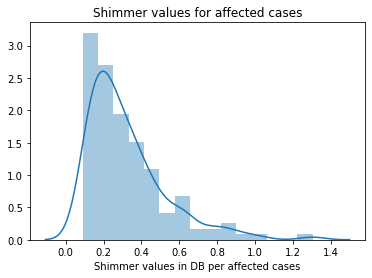

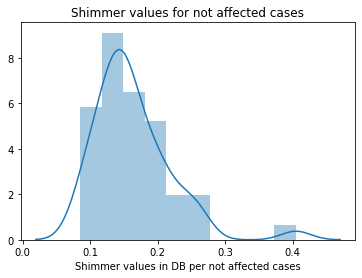

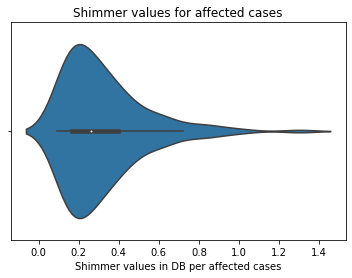

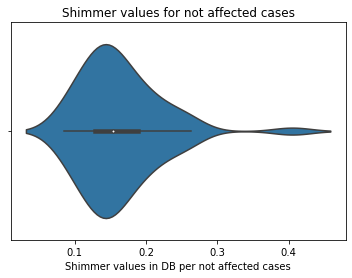

C:\Users\kims\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


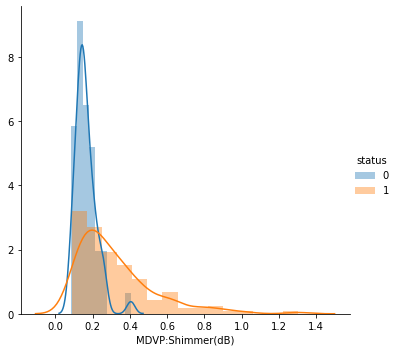

In [20]:
shimmer_affected = df[df['status']==1]['MDVP:Shimmer(dB)'].values
shimmer_not_affected = df[df['status']==0]['MDVP:Shimmer(dB)'].values
sns.distplot(shimmer_affected)
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()

sns.distplot(shimmer_not_affected)
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per not affected cases')
plt.show()

sns.violinplot(shimmer_affected)
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()

sns.violinplot(shimmer_not_affected)
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per not affected cases')
plt.show()

sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "MDVP:Shimmer(dB)").add_legend();
plt.show()

### Let's take a look at Shimmer - Shimmer:DDA

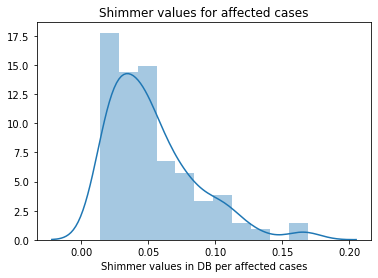

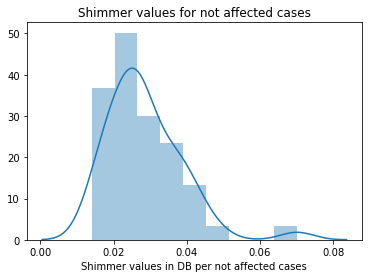

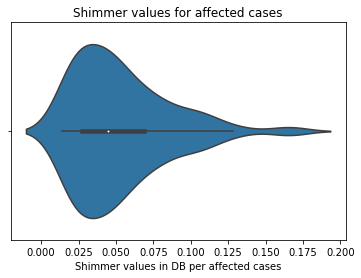

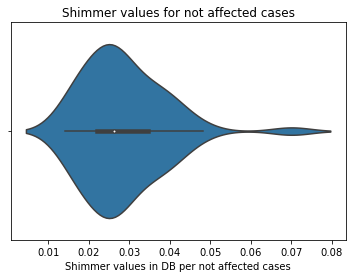

C:\Users\kims\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


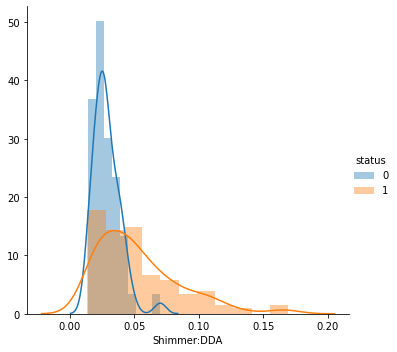

In [21]:
shimmer_DDA_affected = df[df['status']==1]['Shimmer:DDA'].values
shimmer_DDA_not_affected = df[df['status']==0]['Shimmer:DDA'].values
sns.distplot(shimmer_DDA_affected)
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()

sns.distplot(shimmer_DDA_not_affected)
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per not affected cases')
plt.show()

sns.violinplot(shimmer_DDA_affected)
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()

sns.violinplot(shimmer_DDA_not_affected)
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per not affected cases')
plt.show()

sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "Shimmer:DDA").add_legend();
plt.show()

### Let's take a look at Jitter MDVP:Jitter(Abs)

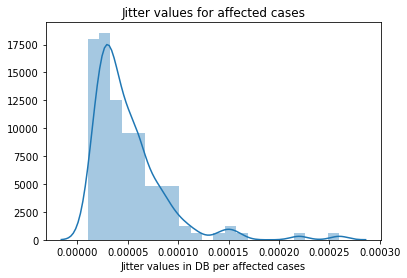

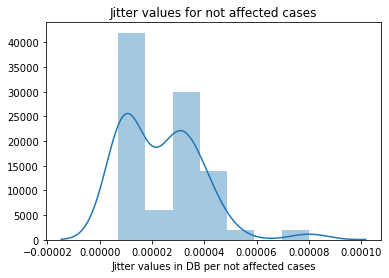

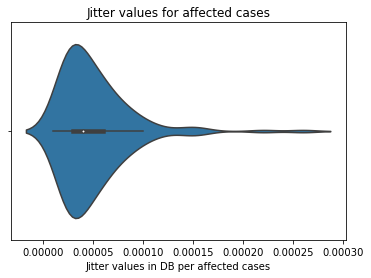

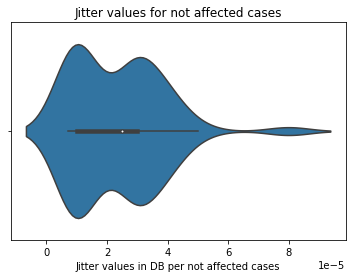

C:\Users\kims\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


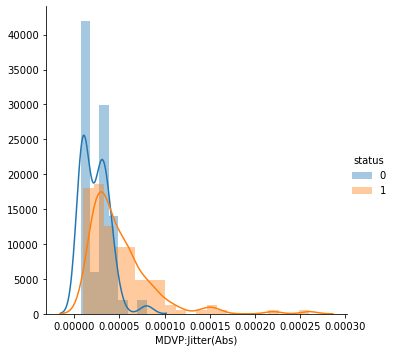

In [22]:
jitter_abs_affected = df[df['status']==1]['MDVP:Jitter(Abs)'].values
jitter_abs_not_affected = df[df['status']==0]['MDVP:Jitter(Abs)'].values
sns.distplot(jitter_abs_affected)
plt.title('Jitter values for affected cases')
plt.xlabel('Jitter values in DB per affected cases')
plt.show()

sns.distplot(jitter_abs_not_affected)
plt.title('Jitter values for not affected cases')
plt.xlabel('Jitter values in DB per not affected cases')
plt.show()

sns.violinplot(jitter_abs_affected)
plt.title('Jitter values for affected cases')
plt.xlabel('Jitter values in DB per affected cases')
plt.show()

sns.violinplot(jitter_abs_not_affected)
plt.title('Jitter values for not affected cases')
plt.xlabel('Jitter values in DB per not affected cases')
plt.show()

sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "MDVP:Jitter(Abs)").add_legend();
plt.show()

### Let's take a look at Jitter - Jitter:DDP

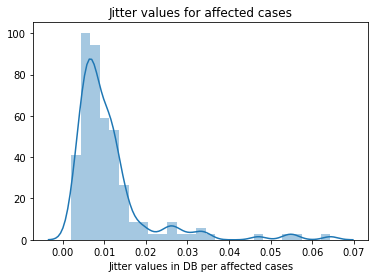

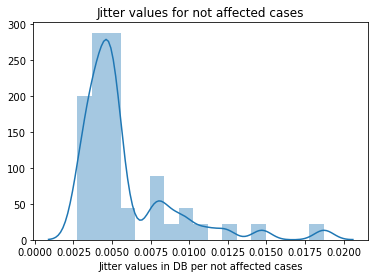

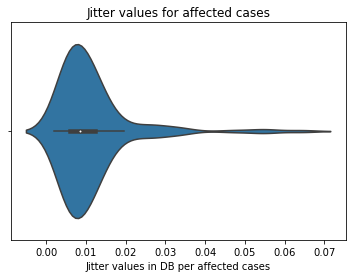

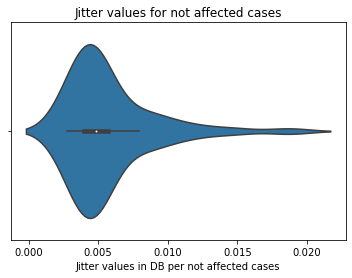

C:\Users\kims\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


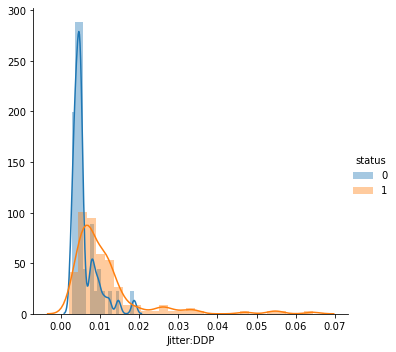

In [23]:
jitter_DDP_affected = df[df['status']==1]['Jitter:DDP'].values
jitter_DDP_not_affected = df[df['status']==0]['Jitter:DDP'].values
sns.distplot(jitter_DDP_affected)
plt.title('Jitter values for affected cases')
plt.xlabel('Jitter values in DB per affected cases')
plt.show()

sns.distplot(jitter_DDP_not_affected)
plt.title('Jitter values for not affected cases')
plt.xlabel('Jitter values in DB per not affected cases')
plt.show()

sns.violinplot(jitter_DDP_affected)
plt.title('Jitter values for affected cases')
plt.xlabel('Jitter values in DB per affected cases')
plt.show()

sns.violinplot(jitter_DDP_not_affected)
plt.title('Jitter values for not affected cases')
plt.xlabel('Jitter values in DB per not affected cases')
plt.show()

sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "Jitter:DDP").add_legend();
plt.show()

In [24]:
df_features = df.drop(columns=['name','status'])

In [26]:
status = df['status']

In [27]:
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(df_features)

In [28]:
from sklearn import decomposition

### Generate cumulative variance plot vs. total num of features to show how much of variance can be explained with varying n_components

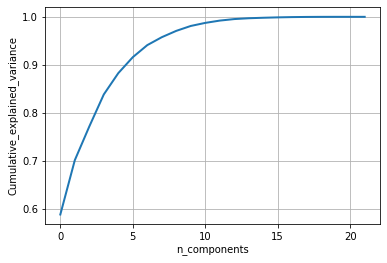

In [32]:
pca = decomposition.PCA()
pca.n_components = 22
sample_data = standardized_data
pca_data = pca.fit_transform(sample_data)

#Plot the PCA specturm
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### We can see that even 5 n_components accounts for a little over 90% of the variance
### To visualize data, we'll reduce to 2d projection

In [36]:
pca.n_components = 2
pca_data2 = pca.fit_transform(sample_data)
pca_data2 = np.vstack((pca_data2.T, status)).T

In [37]:
pca_df = pd.DataFrame(data=pca_data2,columns=('1st_principal', '2nd_principal', 'status'))

C:\Users\kims\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


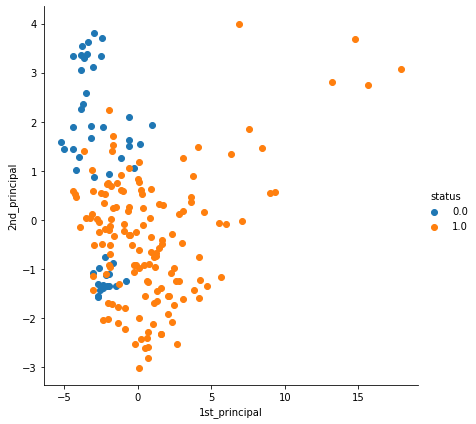

In [38]:
sns.FacetGrid(pca_df, hue="status", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [42]:
pca.n_components = 5
pca_data5 = pca.fit_transform(sample_data)
pca_data5 = np.vstack((pca_data5.T, status)).T

In [43]:
pca_df5 = pd.DataFrame(data=pca_data5,columns=('1st_principal', '2nd_principal', '3rd_principal', '4th_principal', '5th_principal', 'status'))
pca_df5

,1st_principal,2nd_principal,3rd_principal,4th_principal,5th_principal,status
0,2.096614,-1.550607,-1.265070,-0.840002,-0.726869,1.0
1,4.709331,-1.334593,-1.057654,-2.139739,-1.177907,1.0
2,3.852615,-1.426221,-1.824965,-1.163920,-1.265558,1.0
3,4.134771,-1.581914,-1.388036,-1.463193,-1.405647,1.0
4,5.689690,-1.150314,-2.421017,-1.344791,-0.849936,1.0
...,...,...,...,...,...,...
190,0.125326,1.539535,0.539230,-0.905930,1.674237,0.0
191,-0.572416,1.620729,0.712497,0.052934,0.458395,0.0
192,1.001372,1.925491,-0.361749,2.689467,0.733649,0.0
193,-0.615343,2.090390,0.823242,1.791749,0.832962,0.0


## Evaluate Performance of Models

In [44]:
y=pca_df5['status']
x=pca_df5.drop(columns='status')

In [46]:
train_size=0.80
test_size=0.20
seed=123

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

In [47]:
n_neighbors=5
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [48]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier(n_neighbors=n_neighbors)))
models.append(('SVC',SVC()))
models.append(("decision_tree",DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

names=[]
predictions=[]
error='accuracy'

for name,model in models:
    fold=KFold(n_splits=10)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)

LogisticRegression : 0.846250 (0.083280)
knn : 0.877917 (0.034513)
SVC : 0.846250 (0.094492)
decision_tree : 0.839167 (0.060358)
Naive Bayes : 0.762917 (0.057779)


### Let's look at knn and Logistic Regression algorithms with 5 principal components
### knn Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
algorithm = ['ball_tree', 'kd_tree', 'brute']
p=[1,2]

param_grid=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,algorithm=algorithm,p=p)
model=KNeighborsClassifier(n_neighbors=n_neighbors)

fold=KFold(n_splits=10)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.935833 using {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2} 


### Logistic Regression Tuning

In [64]:
c = np.logspace(-4, 4, 20)

param_grid=dict(C=c)
model=LogisticRegression()

fold=KFold(n_splits=10)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.852917 using {'C': 4.281332398719396} 


### Evaluate Performance of Ensemble Methods

In [65]:
# Boosting methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Bagging methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

ensembles=[]
ensembles.append(('AdaBoost',AdaBoostClassifier()))
ensembles.append(('GradientBoost',GradientBoostingClassifier()))
ensembles.append(('RandomForest',RandomForestClassifier()))
ensembles.append(('ExtraTrees',ExtraTreesClassifier()))

In [66]:
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)

AdaBoost : 0.858750 (0.105778)
GradientBoost : 0.891667 (0.057524)
RandomForest : 0.878333 (0.061627)
ExtraTrees : 0.910833 (0.058458)


### Let's look at Gradient Boosting and Extra Trees Ensembles with 5 principal components

### Gradient Boosting Tuning

In [67]:
n_estimators=[10,20,30,40,50,100,150,200,250,300]
learning_rate=[0.001,0.01,0.1,0.3,0.5,0.7,1.0]
max_depth=[2,3,4,5]
max_features=['sqrt','log2']

param_grid=dict(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth,max_features=max_features)
model=GradientBoostingClassifier()

fold=KFold(n_splits=10)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.917500 using {'learning_rate': 0.3, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50} 


### Extra Trees Tuning

In [70]:
n_estimators=[10,20,30,40,50,100,150,200]
max_features=['sqrt','log2']
criterion=['gini','entropy']

param_grid=dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion)
model=ExtraTreesClassifier()

fold=KFold(n_splits=10)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.916250 using {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 40} 


#### knn Classifier Best: 0.935833 using {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
#### Logistic Regression Best: 0.852917 using {'C': 4.281332398719396} 
#### Gradient Boosting Best: 0.917500 using {'learning_rate': 0.3, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
#### Extra Trees Best: 0.916250 using {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 40} 

## knn Classifier performed the best so we're going to use this algo to fit and predict

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model=KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree', leaf_size=1, p=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_predtrain = model.predict(x_train)

accuracy_mean=accuracy_score(y_train,y_predtrain)
accuracy_matric=confusion_matrix(y_train,y_predtrain)
print("train set",accuracy_mean)
print("train set matrix",accuracy_matric)

accuracy_mean=accuracy_score(y_test,y_pred)
accuracy_matric=confusion_matrix(y_test,y_pred)
print("test set",accuracy_mean)
print("test set matrix",accuracy_matric)

train set 1.0
train set matrix [[ 38   0]
 [  0 118]]
test set 0.8974358974358975
test set matrix [[ 9  1]
 [ 3 26]]


### 89% not that great

### Try n_components = 11

In [78]:
pca.n_components = 11
pca_data11 = pca.fit_transform(sample_data)
pca_data11 = np.vstack((pca_data11.T, status)).T

In [79]:
pca_df11 = pd.DataFrame(data=pca_data11,columns=('1st_principal', '2nd_principal', '3rd_principal', '4th_principal', '5th_principal', '6th_principal','7th_principal','8th_principal','9th_principal','10th_principal','11th_principal','status'))
pca_df11

,1st_principal,2nd_principal,3rd_principal,4th_principal,5th_principal,6th_principal,7th_principal,8th_principal,9th_principal,10th_principal,11th_principal,status
0,2.096614,-1.550607,-1.265070,-0.840002,-0.726869,1.101991,-0.538584,-0.162566,0.351270,-0.256905,-0.319290,1.0
1,4.709331,-1.334593,-1.057654,-2.139739,-1.177907,0.754064,0.102320,-0.232575,0.798009,0.130206,-0.473575,1.0
2,3.852615,-1.426221,-1.824965,-1.163920,-1.265558,0.568478,-0.047684,-0.103205,0.638250,-0.076864,-0.508643,1.0
3,4.134771,-1.581914,-1.388036,-1.463193,-1.405647,0.617057,0.016264,-0.169903,0.906802,0.096672,-0.688064,1.0
4,5.689690,-1.150314,-2.421017,-1.344791,-0.849936,0.939659,-0.107455,-1.126961,1.180605,0.333008,-0.625573,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.125326,1.539535,0.539230,-0.905930,1.674237,0.797071,-1.141812,-0.173129,-0.010282,0.389425,-0.068985,0.0
191,-0.572416,1.620729,0.712497,0.052934,0.458395,0.514197,-1.333679,-0.899936,-0.488698,-0.392115,-0.174213,0.0
192,1.001372,1.925491,-0.361749,2.689467,0.733649,0.061957,-1.804737,0.617729,-0.811937,-0.433277,0.031661,0.0
193,-0.615343,2.090390,0.823242,1.791749,0.832962,1.496561,0.104416,0.468933,-0.286230,-0.927245,-0.232765,0.0


In [80]:
y=pca_df11['status']
x=pca_df11.drop(columns='status')

train_size=0.80
test_size=0.20
seed=123

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

n_neighbors=5
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [82]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier(n_neighbors=n_neighbors)))
models.append(('SVC',SVC()))
models.append(("decision_tree",DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

names=[]
predictions=[]
error='accuracy'

for name,model in models:
    fold=KFold(n_splits=10)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)

LogisticRegression : 0.839583 (0.083401)
knn : 0.911250 (0.057706)
SVC : 0.871667 (0.102838)
decision_tree : 0.865417 (0.073055)
Naive Bayes : 0.775833 (0.070804)


### Let's look at knn and SVC algorithms with 11 principal components

### knn Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
algorithm = ['ball_tree', 'kd_tree', 'brute']
p=[1,2]

param_grid=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,algorithm=algorithm,p=p)
model=KNeighborsClassifier(n_neighbors=n_neighbors)

fold=KFold(n_splits=10)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.935833 using {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2} 


### SVC Tuning

In [86]:
C = [0.1,1,10,100]
gamma = [0.1,1,10,100]
kernel = ['linear','rbf','poly']
degree = [1,2,3,4,5]

param_grid=dict(C=C,kernel=kernel,degree=degree,gamma=gamma)
model=SVC()

fold=KFold(n_splits=10)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.935833 using {'C': 100, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'} 


### Evaluate Performance of Ensemble Methods

In [88]:
# Boosting methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Bagging methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

ensembles=[]
ensembles.append(('AdaBoost',AdaBoostClassifier()))
ensembles.append(('GradientBoost',GradientBoostingClassifier()))
ensembles.append(('RandomForest',RandomForestClassifier()))
ensembles.append(('ExtraTrees',ExtraTreesClassifier()))

In [89]:
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)

AdaBoost : 0.838750 (0.115966)
GradientBoost : 0.872083 (0.071274)
RandomForest : 0.871667 (0.088325)
ExtraTrees : 0.897500 (0.072844)


### Let's look at Gradient Boosting and Extra Trees Ensembles with 5 principal components

### Gradient Boosting Tuning

In [90]:
n_estimators=[10,20,30,40,50,100,150,200,250,300]
learning_rate=[0.001,0.01,0.1,0.3,0.5,0.7,1.0]
max_depth=[2,3,4,5]
max_features=['sqrt','log2']

param_grid=dict(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth,max_features=max_features)
model=GradientBoostingClassifier()

fold=KFold(n_splits=10)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.910833 using {'learning_rate': 0.3, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50} 


### Extra Trees Tuning

In [91]:
n_estimators=[10,20,30,40,50,100,150,200]
max_features=['sqrt','log2']
criterion=['gini','entropy']

param_grid=dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion)
model=ExtraTreesClassifier()

fold=KFold(n_splits=10)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.935833 using {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 20} 


### knn, SVC, and Extra Trees all had the same accuracy performance

### knn

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model=KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree', leaf_size=1, p=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_predtrain = model.predict(x_train)

accuracy_mean=accuracy_score(y_train,y_predtrain)
accuracy_metric=confusion_matrix(y_train,y_predtrain)
print("train set",accuracy_mean)
print("train set matrix",accuracy_metric)

accuracy_mean=accuracy_score(y_test,y_pred)
accuracy_metric=confusion_matrix(y_test,y_pred)
print("test set",accuracy_mean)
print("test set matrix",accuracy_metric)

train set 1.0
train set matrix [[ 38   0]
 [  0 118]]
test set 0.9487179487179487
test set matrix [[10  0]
 [ 2 27]]


### SVC

In [94]:
model=SVC(C=100, degree=1, gamma=0.1, kernel='rbf')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_predtrain = model.predict(x_train)

accuracy_mean=accuracy_score(y_train,y_predtrain)
accuracy_metric=confusion_matrix(y_train,y_predtrain)
print("train set",accuracy_mean)
print("train set matrix",accuracy_metric)

accuracy_mean=accuracy_score(y_test,y_pred)
accuracy_metric=confusion_matrix(y_test,y_pred)
print("test set",accuracy_mean)
print("test set matrix",accuracy_metric)

train set 1.0
train set matrix [[ 38   0]
 [  0 118]]
test set 0.9487179487179487
test set matrix [[10  0]
 [ 2 27]]


### Extra Trees

In [95]:
model=ExtraTreesClassifier(criterion='gini', n_estimators=20)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_predtrain = model.predict(x_train)

accuracy_mean=accuracy_score(y_train,y_predtrain)
accuracy_metric=confusion_matrix(y_train,y_predtrain)
print("train set",accuracy_mean)
print("train set matrix",accuracy_metric)

accuracy_mean=accuracy_score(y_test,y_pred)
accuracy_metric=confusion_matrix(y_test,y_pred)
print("test set",accuracy_mean)
print("test set matrix",accuracy_metric)

train set 1.0
train set matrix [[ 38   0]
 [  0 118]]
test set 0.9743589743589743
test set matrix [[ 9  1]
 [ 0 29]]
